In [341]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10, 6)

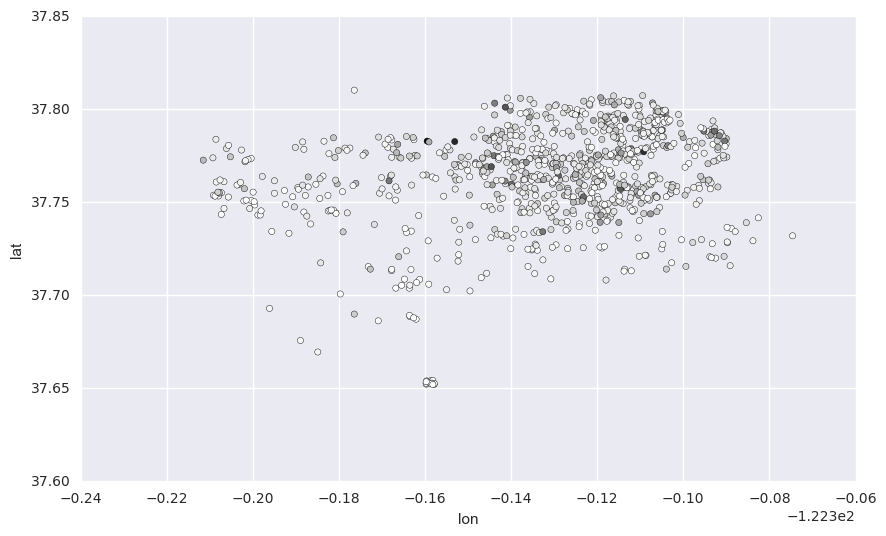

In [349]:
df = pd.read_csv('SF_data_4.csv',delimiter=';');df=df[df.price<1000];df=df.dropna();df=df[df.lon<-122.37];df=df[df.lat<37.85];
df_train = df[:int(len(df.index)*.75)]
df_test = df[int(len(df.index)*.75):]
df.plot.scatter(x='lon',y='lat',c=df['price']/25);

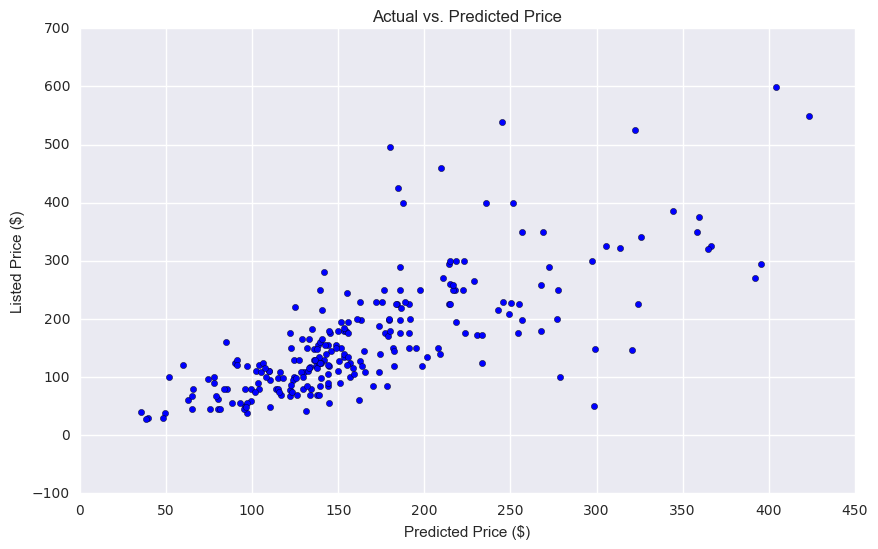

In [350]:
featureList = ['star_rating','person_cap','instant_book','acc_rating','checkin_rating','cleanliness_rating','communication_rating','guest_sat','is_superhost','loc_rating','lat','lon','pic_count','saved_to_wishlist_count','rev_count','value_rating']
for i in range(1,51):
    featureList.append('amen'+str(i))
X = np.array(df_train[featureList])
Y = np.array(df_train['price'].astype('float'))
clf=RandomForestRegressor(n_estimators=500)
clf.fit(df_train[featureList],df_train['price'])
pred = clf.predict(df_test[featureList])
plt.scatter(pred,df_test['price'])
plt.title('Actual vs. Predicted Price')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

Feature ranking:
1. feature 1 (0.431115)
2. feature 10 (0.097621)
3. feature 13 (0.071457)
4. feature 11 (0.056336)
5. feature 12 (0.052054)
6. feature 7 (0.039100)
7. feature 14 (0.032689)
8. feature 5 (0.015640)
9. feature 0 (0.010265)
10. feature 46 (0.009161)
11. feature 16 (0.008840)
12. feature 47 (0.007953)
13. feature 17 (0.007798)
14. feature 43 (0.007332)
15. feature 2 (0.006758)
16. feature 42 (0.006705)
17. feature 15 (0.005983)
18. feature 57 (0.005675)
19. feature 54 (0.005560)
20. feature 9 (0.005191)
21. feature 31 (0.004684)
22. feature 50 (0.004664)
23. feature 51 (0.004462)
24. feature 33 (0.004377)
25. feature 8 (0.004270)
26. feature 21 (0.004224)
27. feature 32 (0.004216)
28. feature 24 (0.004132)
29. feature 64 (0.004077)
30. feature 52 (0.004016)
31. feature 58 (0.003980)
32. feature 36 (0.003924)
33. feature 22 (0.003828)
34. feature 49 (0.003591)
35. feature 3 (0.003558)
36. feature 29 (0.003549)
37. feature 48 (0.003487)
38. feature 62 (0.003438)
39. feature 

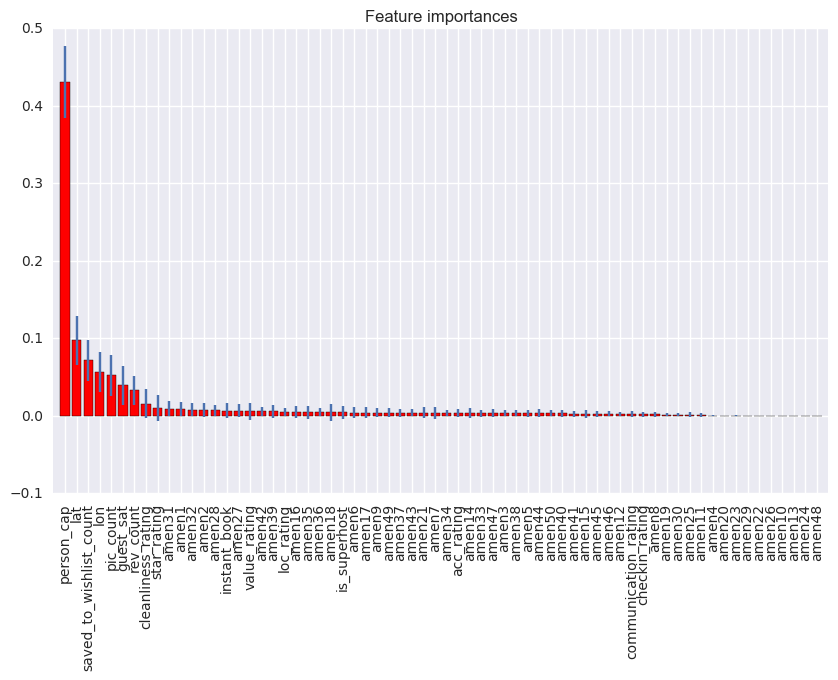

In [348]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [featureList[i] for i in indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

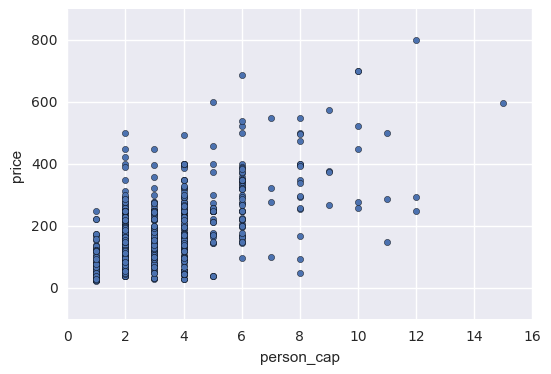

In [340]:
df.plot.scatter(x='person_cap',y='price')

In [326]:
df.head()

,roomID,acc_rating,bed_type,cancel_policy,checkin_rating,cleanliness_rating,communication_rating,guest_sat,hosting_id,instant_book,...,amen41,amen42,amen43,amen44,amen45,amen46,amen47,amen48,amen49,amen50
0,14990478,10,Real Bed,4,10,10,10,98,14990478,True,...,True,True,True,True,True,True,True,False,True,True
1,15843462,10,Real Bed,4,9,10,9,93,15843462,True,...,True,True,True,True,False,False,True,False,False,False
2,13884730,10,Real Bed,5,10,10,10,100,13884730,True,...,True,False,True,True,True,True,False,False,False,False
3,15675790,10,Real Bed,3,10,10,10,96,15675790,True,...,True,False,False,False,False,False,False,False,True,True
4,3759246,9,Real Bed,4,10,9,10,92,3759246,True,...,True,False,False,False,False,False,False,False,True,True
